# Codeforces User Performance Analysis

In this project, we will analyze the data of Codeforces users to identify patterns and factors that influence user performance. By understanding these factors, we aim to uncover insights that will help users improve their performance on the platform.

We will examine key data points such as:
- Problem tags
- Submission verdicts
- Problem indices
- User success rates

let's start the analysis!



## Data Collection

We will use the Codeforces API to collect data about the user's submissions and problem data
https://codeforces.com/apiHelp
.


In [139]:
# Importing necessary libraries
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Define user handle and the number of submissions to fetch
handle = "khaled40"  # The Codeforces user handle
count = 200           # The number of submissions to retrieve

# Construct the API URL
url = f"https://codeforces.com/api/user.status?handle={handle}&from=1&count={count}"

# Send GET request to fetch user submission data
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code != 200:
    print("Failed to fetch data from Codeforces API.")
    exit()  # Exit the script if the API request fails

# Extract data from the response JSON
data = response.json().get("result", [])

# Check if any data was returned
if not data:
    print("No data found for the user.")
    exit()  # Exit if no data is found

# Define the CSV header
header = [
    "Submission ID", "Contest ID", "Problem Index", "Problem Name", 
    "Problem Tags", "Programming Language", "Verdict", 
    "Time Consumed (ms)", "Memory Consumed (bytes)", "Points"
]

# Write data to a CSV file
filename = "user_submissions.csv"
with open(filename, mode="w", newline='', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(header)  # Write the header row
    
    # Write each submission's details
    for submission in data:
        row = [
            submission.get("id"),
            submission.get("contestId"),
            submission.get("problem", {}).get("index"),
            submission.get("problem", {}).get("name"),
            ", ".join(submission.get("problem", {}).get("tags", [])),  # Join tags with commas
            submission.get("programmingLanguage"),
            submission.get("verdict"),
            submission.get("timeConsumedMillis"),
            submission.get("memoryConsumedBytes"),
            submission.get("points", "N/A"),  # Default to "N/A" if points is missing
        ]
        writer.writerow(row)

print(f"Data saved to {filename}")

# Load the saved CSV into a pandas DataFrame for further analysis
df = pd.read_csv(filename)

# Print the first few rows of the DataFrame for verification
print(df.head())


Data saved to user_submissions.csv
   Submission ID  Contest ID Problem Index    Problem Name  \
0      292022512          29             C     Mail Stamps   
1      291983901          29             C     Mail Stamps   
2      291841373         246             D  Colorful Graph   
3      291841244         246             D  Colorful Graph   
4      291841202         246             D  Colorful Graph   

                                        Problem Tags Programming Language  \
0  data structures, dfs and similar, graphs, impl...    C++20 (GCC 13-64)   
1  data structures, dfs and similar, graphs, impl...    C++20 (GCC 13-64)   
2               brute force, dfs and similar, graphs    C++20 (GCC 13-64)   
3               brute force, dfs and similar, graphs    C++20 (GCC 13-64)   
4               brute force, dfs and similar, graphs    C++20 (GCC 13-64)   

        Verdict  Time Consumed (ms)  Memory Consumed (bytes)  Points  
0            OK                 936                 210944


## Data Cleaning Phase

In this phase, we will focus on cleaning the data by addressing the following key steps:









### 1. Remove Null Values
We will start by removing any rows with null or missing values, as they can lead to inaccurate analysis and affect the reliability of our results.

In [140]:
# Count null values in each column
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Submission ID                0
Contest ID                   0
Problem Index                0
Problem Name                 0
Problem Tags                 0
Programming Language         0
Verdict                      0
Time Consumed (ms)           0
Memory Consumed (bytes)      0
Points                     200
dtype: int64


### 2. Remove Duplicates
Although there are no duplicates in our data, it's always a good practice to check for and remove any duplicate entries to ensure data consistency.

In [158]:
import pandas as pd

# Count the number of duplicate rows
duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0



### 3. Handle Outliers
Outliers are values that are significantly different from the majority of the data. While outliers can sometimes provide useful insights, they can also skew results if not handled properly.


### 4- Drop unnecessary columns 
Unnecessary or irrelevant columns are removed to simplify the dataset and make it more manageable for analysis or modeling.

In [141]:
# Drop specific columns
columns_to_drop = ["Contest ID", "Points","Programming Language","Time Consumed (ms)","Memory Consumed (bytes)","Contest ID","Problem Name","Submission ID"]
df_1 = df.drop(columns=columns_to_drop)

# Preview the DataFrame after dropping
print("DataFrame after dropping columns:")
print(df_1.head())

DataFrame after dropping columns:
  Problem Index                                       Problem Tags  \
0             C  data structures, dfs and similar, graphs, impl...   
1             C  data structures, dfs and similar, graphs, impl...   
2             D               brute force, dfs and similar, graphs   
3             D               brute force, dfs and similar, graphs   
4             D               brute force, dfs and similar, graphs   

        Verdict  
0            OK  
1  WRONG_ANSWER  
2            OK  
3  WRONG_ANSWER  
4  WRONG_ANSWER  


In [142]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Problem Index  200 non-null    object
 1   Problem Tags   200 non-null    object
 2   Verdict        200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


### 5. Fix Invalid and Inconsistent Values
Finally, we will address any invalid or inconsistent values in the dataset. This includes correcting values that do not adhere to expected formats or criteria (e.g., invalid verdicts or programming languages) to maintain data integrity.

In [143]:
df_1['Problem Index'].unique()



array(['C', 'D', 'B', 'A', 'E', 'B2', 'B1', 'A1', 'F'], dtype=object)

In [144]:
df_1['Verdict'].unique()


array(['OK', 'WRONG_ANSWER', 'TIME_LIMIT_EXCEEDED', 'RUNTIME_ERROR',
       'MEMORY_LIMIT_EXCEEDED', 'IDLENESS_LIMIT_EXCEEDED'], dtype=object)

In [145]:
df_1['Problem Tags'].unique()


array(['data structures, dfs and similar, graphs, implementation',
       'brute force, dfs and similar, graphs',
       'data structures, implementation',
       'binary search, bitmasks, brute force',
       'binary search, brute force, constructive algorithms, greedy',
       'constructive algorithms, geometry, greedy, math',
       'combinatorics, dp, math',
       'binary search, greedy, strings, two pointers',
       'binary search, greedy, math',
       'constructive algorithms, greedy, implementation, math',
       'brute force, implementation, math', 'math', 'brute force, math',
       'bitmasks, greedy, math',
       'bitmasks, constructive algorithms, greedy',
       'bitmasks, brute force, constructive algorithms, greedy',
       'data structures, math, number theory', 'greedy, math',
       'implementation, math', 'constructive algorithms, greedy, math',
       'bitmasks, greedy, two pointers', 'bitmasks, brute force',
       'bitmasks, greedy', 'bitmasks, combinatorics, m

In [146]:
# Transform the 'verdict' column
df_1['Verdict'] = df['Verdict']
df_1['Problem Index'] = df_1['Problem Index'].str[0]


# Preview the modified DataFrame
print("DataFrame after transforming 'verdict' column:")
print(df_1.head())


DataFrame after transforming 'verdict' column:
  Problem Index                                       Problem Tags  \
0             C  data structures, dfs and similar, graphs, impl...   
1             C  data structures, dfs and similar, graphs, impl...   
2             D               brute force, dfs and similar, graphs   
3             D               brute force, dfs and similar, graphs   
4             D               brute force, dfs and similar, graphs   

        Verdict  
0            OK  
1  WRONG_ANSWER  
2            OK  
3  WRONG_ANSWER  
4  WRONG_ANSWER  


In [147]:
df_1['Problem Index'].unique()


array(['C', 'D', 'B', 'A', 'E', 'F'], dtype=object)

In [148]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Problem Index  200 non-null    object
 1   Problem Tags   200 non-null    object
 2   Verdict        200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


##  Data Analysis Phase

In [149]:
print(df_1.describe(include='all'))


       Problem Index                                     Problem Tags  \
count            200                                              200   
unique             6                                               59   
top                B  constructive algorithms, geometry, greedy, math   
freq              78                                               12   

             Verdict  
count            200  
unique             6  
top     WRONG_ANSWER  
freq             118  


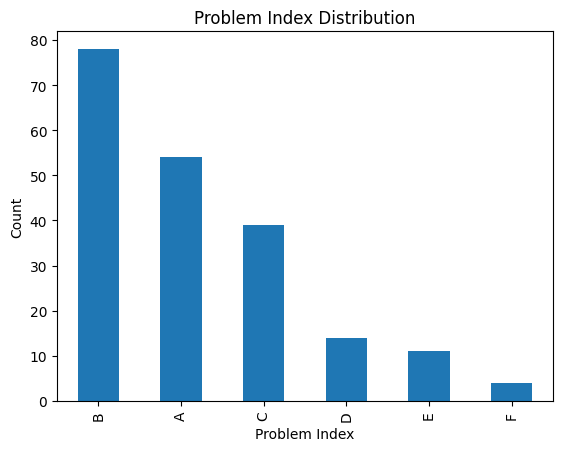

In [150]:
# Count plot for Problem Index 
df_1['Problem Index'].value_counts().plot(kind='bar')
plt.title('Problem Index Distribution')
plt.xlabel('Problem Index')
plt.ylabel('Count')
plt.show()

In [151]:
df_1['Verdict'].unique()


array(['OK', 'WRONG_ANSWER', 'TIME_LIMIT_EXCEEDED', 'RUNTIME_ERROR',
       'MEMORY_LIMIT_EXCEEDED', 'IDLENESS_LIMIT_EXCEEDED'], dtype=object)

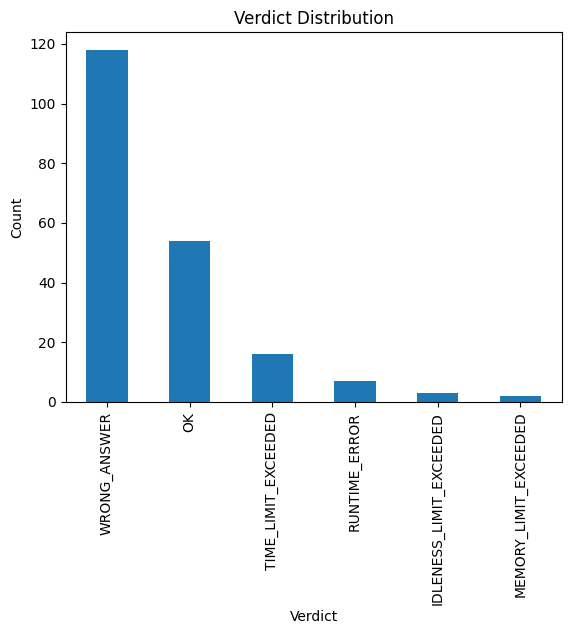

In [152]:
# Count plot for Problem Index 
df_1['Verdict'].value_counts().plot(kind='bar')
plt.title('Verdict Distribution')
plt.xlabel('Verdict')
plt.ylabel('Count')
plt.show()

In [153]:
# Group by Problem Index and Verdict, then count occurrences
index_verdict_counts = df_1.groupby(['Problem Index', 'Verdict']).size().unstack(fill_value=0)

# Display the grouped DataFrame
print(index_verdict_counts)


Verdict        IDLENESS_LIMIT_EXCEEDED  MEMORY_LIMIT_EXCEEDED  OK  \
Problem Index                                                       
A                                    0                      1  17   
B                                    0                      1  25   
C                                    3                      0   7   
D                                    0                      0   3   
E                                    0                      0   2   
F                                    0                      0   0   

Verdict        RUNTIME_ERROR  TIME_LIMIT_EXCEEDED  WRONG_ANSWER  
Problem Index                                                    
A                          2                    2            32  
B                          5                    6            41  
C                          0                    4            25  
D                          0                    2             9  
E                          0                    0  

### Hypothesis Testing

- **Null Hypothesis (H₀):** There is no relationship between Problem Index and Verdict. In other words, the distribution of verdicts is the same across all problem indices.

- **Alternative Hypothesis (H₁):** There is a relationship between Problem Index and Verdict. This means that the verdict distribution varies for different problem indices.


### Chi-Squared Test Results

- **P-Value:** 0.0816

Since the p-value (0.0816) is greater than the significance level (0.05), we fail to reject the null hypothesis (H₀). This means that there is no significant relationship between **Problem Index** and **Verdict**.

In other words, the distribution of verdicts is not dependent on the **Problem Index**, suggesting that the **Problem Index** does not have a significant effect on the verdict.


Chi-Squared Test P-Value: 0.0816
There is no significant relationship between Problem Index and Verdict.


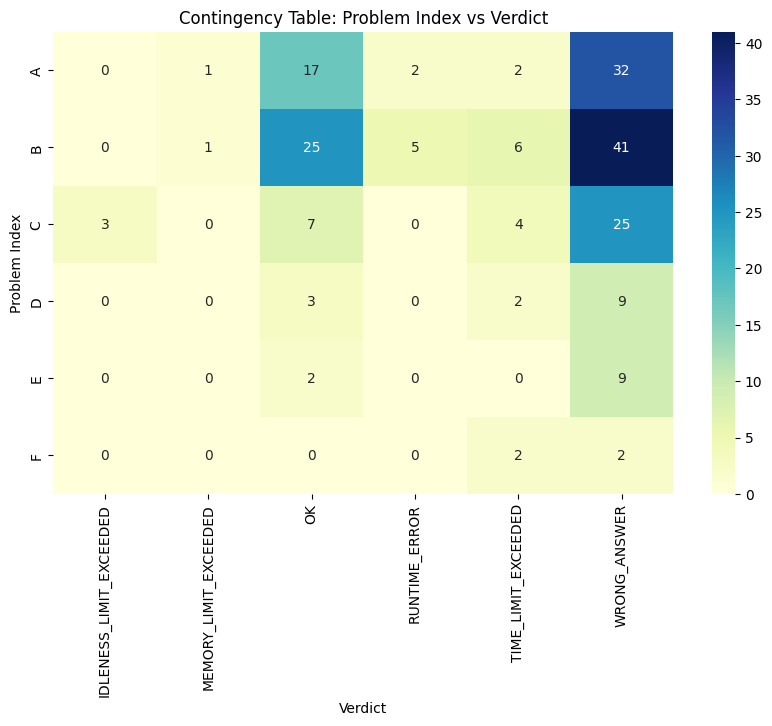

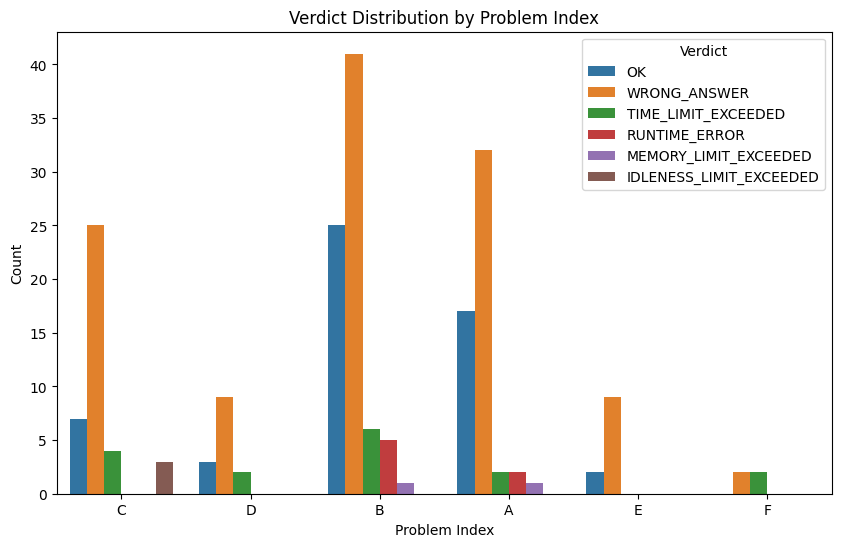

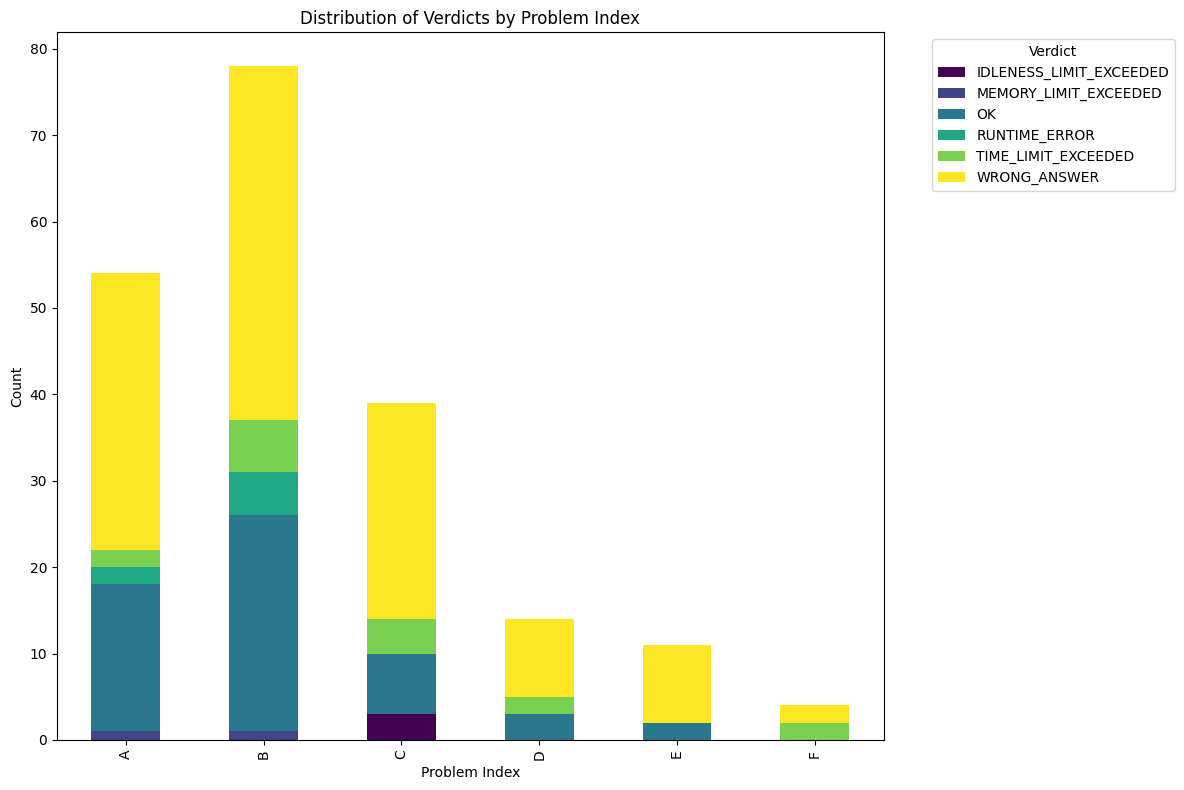

In [157]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming df_1 is your DataFrame with 'Problem Index' and 'Verdict'
# Let's create a contingency table (cross-tabulation) for Problem Index and Verdict
contingency_table = pd.crosstab(df_1['Problem Index'], df_1['Verdict'])

# Perform Chi-Squared Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the p-value from Chi-Squared Test
print(f"Chi-Squared Test P-Value: {p_value:.4f}")

# If the p-value is less than 0.05, we reject the null hypothesis and conclude there is a relationship
if p_value < 0.05:
    print("There is a significant relationship between Problem Index and Verdict.")
else:
    print("There is no significant relationship between Problem Index and Verdict.")

# Visualizing the contingency table using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table: Problem Index vs Verdict')
plt.xlabel('Verdict')
plt.ylabel('Problem Index')
plt.show()

# Bar plot for the count of Verdicts for each Problem Index
plt.figure(figsize=(10, 6))
sns.countplot(x='Problem Index', hue='Verdict', data=df_1)
plt.title('Verdict Distribution by Problem Index')
plt.xlabel('Problem Index')
plt.ylabel('Count')
plt.show()


# Plot stacked bar chart
index_verdict_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Distribution of Verdicts by Problem Index')
plt.xlabel('Problem Index')
plt.ylabel('Count')
plt.legend(title='Verdict', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### Hypothesis Testing

- **Null Hypothesis (H₀):** The distribution of verdicts (OK, WRONG_ANSWER, etc.) is independent of the problem tags (greedy, graphs, math, etc.).

- **Alternative Hypothesis (H₁):** The distribution of verdicts is dependent on the problem tags.

Since **p-value** is 0.0000, which is much less than the significance level of 0.05, you reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁). 

This suggests that there is indeed a **significant relationship** between **Problem Tags** and **Verdict**.


  Problem Index                                       Problem Tags  \
0             C  data structures, dfs and similar, graphs, impl...   
1             C  data structures, dfs and similar, graphs, impl...   
2             D               brute force, dfs and similar, graphs   
3             D               brute force, dfs and similar, graphs   
4             D               brute force, dfs and similar, graphs   

        Verdict  
0            OK  
1  WRONG_ANSWER  
2            OK  
3  WRONG_ANSWER  
4  WRONG_ANSWER  
Chi-Square Test P-Value: 0.0000


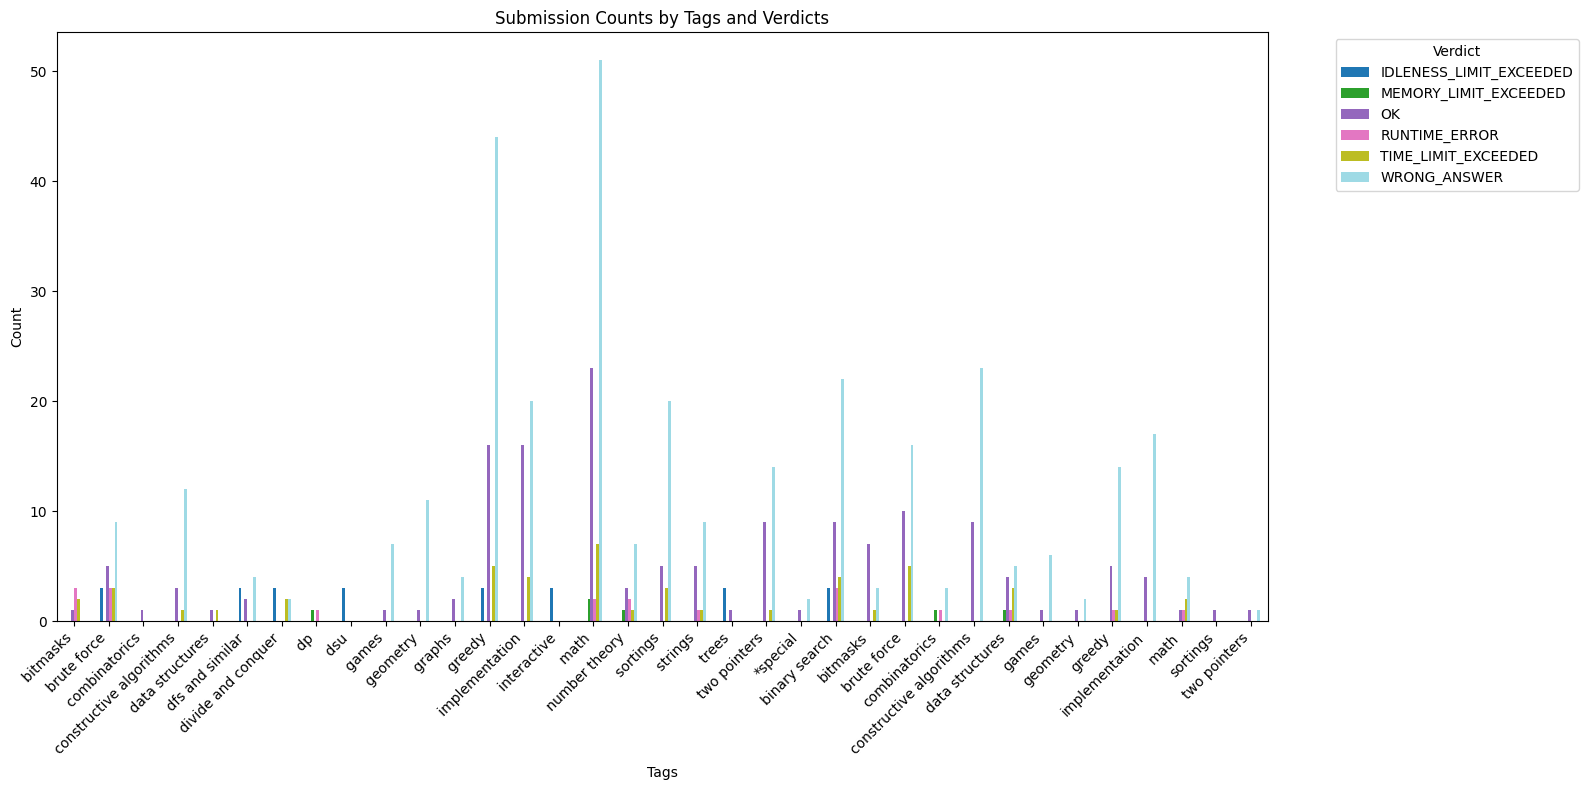


Tag-wise Submission Verdict Counts:
Verdict                   IDLENESS_LIMIT_EXCEEDED  MEMORY_LIMIT_EXCEEDED  \
problem_tags                                                               
 bitmasks                                     0.0                    0.0   
 brute force                                  3.0                    0.0   
 combinatorics                                0.0                    0.0   
 constructive algorithms                      0.0                    0.0   
 data structures                              0.0                    0.0   
 dfs and similar                              3.0                    0.0   
 divide and conquer                           3.0                    0.0   
 dp                                           0.0                    1.0   
 dsu                                          3.0                    0.0   
 games                                        0.0                    0.0   
 geometry                                     0.0  

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Check the first few rows of df_1 to ensure the data looks correct
print(df_1.head())

# Assuming 'Problem Tags' contains tags (either as a list or a comma-separated string)
if "Problem Tags" in df_1.columns and "Verdict" in df_1.columns:
    # Handle cases where 'Problem Tags' contains a list or a string of tags
    if df_1["Problem Tags"].apply(lambda x: isinstance(x, list)).all():
        # If 'Problem Tags' contains lists of tags
        df_1["problem_tags"] = df_1["Problem Tags"]
    else:
        # If 'Problem Tags' contains comma-separated strings of tags
        df_1["problem_tags"] = df_1["Problem Tags"].apply(lambda x: x.split(",") if isinstance(x, str) else [])

    # Convert 'Verdict' to string type (if it's not already)
    df_1["Verdict"] = df_1["Verdict"].astype(str)

    # Explode the 'problem_tags' column to create separate rows for each tag
    exploded_tags = df_1.explode("problem_tags")

    # Group by 'problem_tags' and 'Verdict', then count occurrences
    tag_verdict_counts = exploded_tags.groupby(["problem_tags", "Verdict"]).size().reset_index(name="count")

    # Create a pivot table for the chi-square test
    pivot_table = tag_verdict_counts.pivot(
        index="problem_tags", columns="Verdict", values="count"
    ).fillna(0)

    # Perform Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(pivot_table)

    # Print the p-value
    print(f"Chi-Square Test P-Value: {p:.4f}")

    # Plot grouped bar chart for counts by verdict and tags
    pivot_table.plot(kind="bar", figsize=(16, 8), colormap="tab20")
    plt.title("Submission Counts by Tags and Verdicts")
    plt.xlabel("Tags")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Verdict", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Display statistics
    print("\nTag-wise Submission Verdict Counts:")
    print(pivot_table)

else:
    print("Required fields (Problem Tags or Verdict) are missing in the data.")


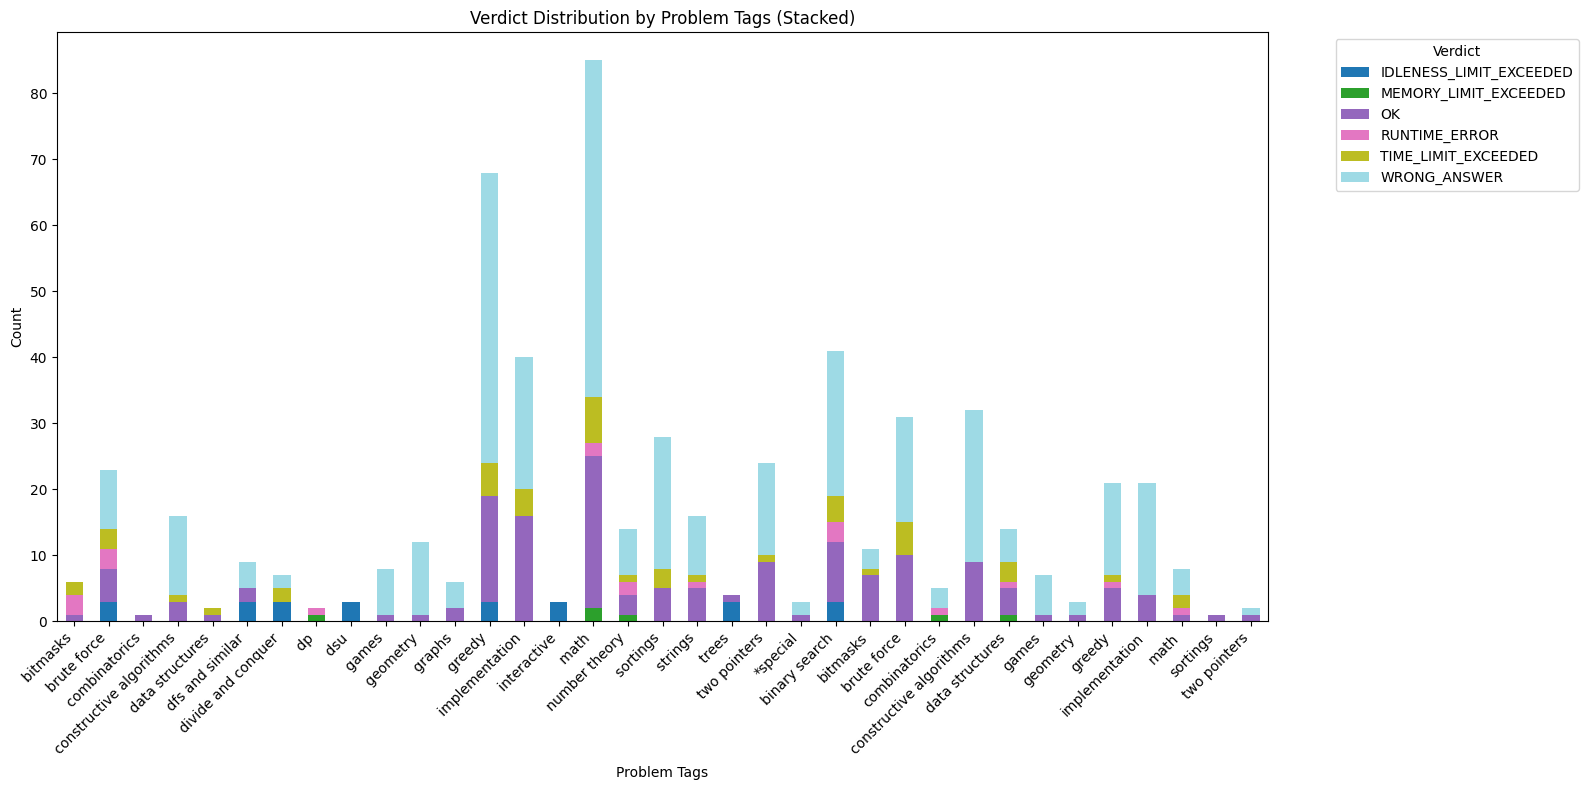

In [156]:
# Plot a stacked bar chart of verdicts by problem tags
pivot_table.plot(kind="bar", stacked=True, figsize=(16, 8), colormap="tab20")
plt.title("Verdict Distribution by Problem Tags (Stacked)")
plt.xlabel("Problem Tags")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Verdict", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Summary

- There is a **significant relationship** between **Problem Tags** and **Verdict**, indicating that the tags associated with a problem can influence the outcome of the submission.
  
- However, there is **no significant relationship** between **Problem Index** and **Verdict**, meaning that the problem index, which is often related to the problem's difficulty, does not have a direct impact on the verdict. 

- This suggests that a user's ability to solve a problem is more likely to depend on their understanding of the problem and their knowledge of the relevant **Problem Tags**. A good grasp of the tags can help users solve problems more efficiently, saving both time and energy.
